In [386]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [387]:
import pandas as pd
import matplotlib.pyplot as plt

In [388]:
donnees = pd.read_csv("CAR EVALUATION DATASET/car.data",sep=",",names = ["buying","maint","doors","persons","lug_boot","safety","target"])

In [389]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   target    1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [390]:
donnees.describe()

,buying,maint,doors,persons,lug_boot,safety,target
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [391]:
donnees = donnees.dropna()
y = donnees.drop(["buying", "maint", "doors", "persons", "lug_boot", "safety"],axis = 1)
X = donnees.drop(["target"], axis=1)

In [392]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
dtypes: object(6)
memory usage: 94.5+ KB


In [393]:
print(y.info())
print(y)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 0 to 1727
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  1728 non-null   object
dtypes: object(1)
memory usage: 27.0+ KB
None
     target
0     unacc
1     unacc
2     unacc
3     unacc
4     unacc
...     ...
1723   good
1724  vgood
1725  unacc
1726   good
1727  vgood

[1728 rows x 1 columns]


In [394]:
#Verifier les différentes valeurs du dataset :

def valeurUnique(y, colonne):
    valeur = []
    for i in range(len(y)):
        if y.iloc[i,colonne] not in valeur:
            valeur.append(y.iloc[i,colonne])
    return valeur

valeurUnique(y,0)

['unacc', 'acc', 'vgood', 'good']

In [395]:
#Attribuer des valeurs numériques aux données du dataset (target)

unacc = 0
acc = 0
good = 0
vgood = 0

for i in range(len(y)):
    if y.iloc[i,0] == "unacc":
        y.iloc[i,0] = 0
        unacc+=1
    elif y.iloc[i,0] == "acc":
        y.iloc[i,0] = 1
        acc+=1
    elif y.iloc[i,0] == "good":
        y.iloc[i,0] = 2
        good+=1
    elif y.iloc[i,0] == "vgood":
        y.iloc[i,0] = 3
        vgood+=1

valeurUnique(y,0)
print("Unacc :",unacc,"\nacc : ",acc,"\ngood : ",good,"\nvgood : ", vgood)


Unacc : 1210 
acc :  384 
good :  69 
vgood :  65


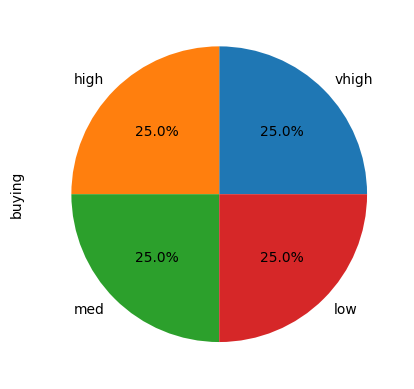

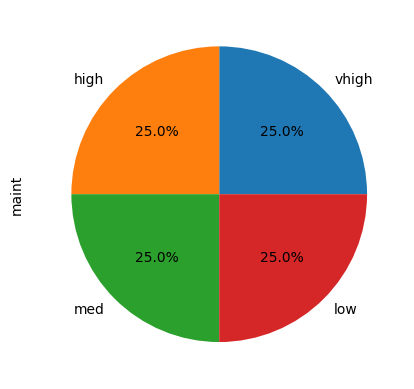

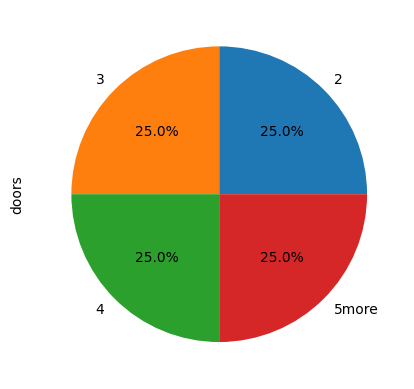

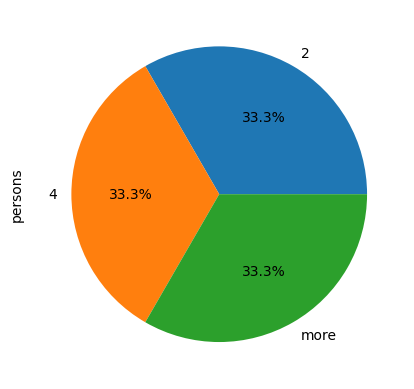

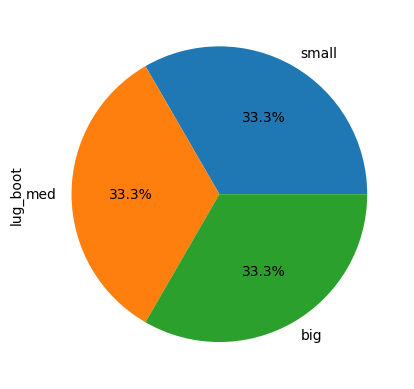

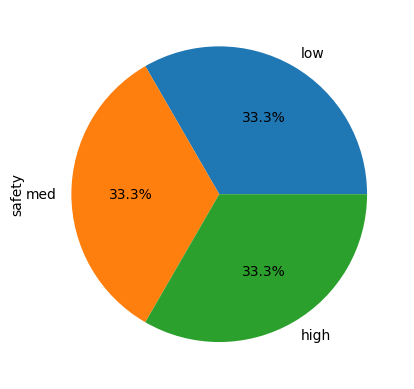

In [396]:
#Attribuer des valeurs numériques aux données du dataset X

#valeurUnique(X,0) #valeurs pour la colonne Buying


def attribution(X,nombreColonnes):
    for i in range(nombreColonnes):
        liste= valeurUnique(X, i)
        nomColonne = X.columns[i]
        for j in range(len(X)):
            if X.iloc[j,i] in liste:
                X.iloc[j,i] = liste.index(X.iloc[j,i])
        donnees[nomColonne].value_counts(normalize=True).plot(kind='pie', autopct="%1.1f%%")
        plt.show()
        
attribution(X,len(X.axes[1]))

In [397]:
X

,buying,maint,doors,persons,lug_boot,safety
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,2
3,0,0,0,0,1,0
4,0,0,0,0,1,1
...,...,...,...,...,...,...
1723,3,3,3,2,1,1
1724,3,3,3,2,1,2
1725,3,3,3,2,2,0
1726,3,3,3,2,2,1


In [398]:
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV

0.815028901734104


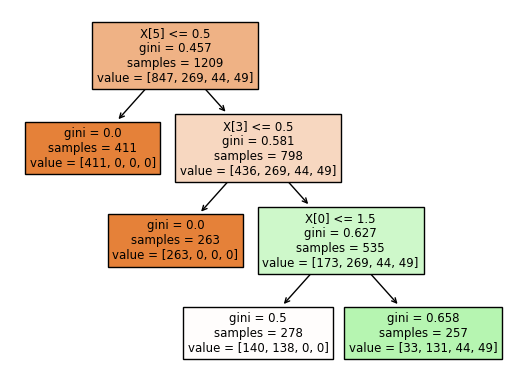

In [399]:
#création de l'arbre de décision
X_train, X_test, Y_train, Y_test = train_test_split(X, y.astype('int'), train_size=0.7, random_state=0)
clf = tree.DecisionTreeClassifier(max_depth = 3, min_samples_leaf=60)
clf.fit(X_train, Y_train)
tree.plot_tree(clf, filled=True)
print(clf.score(X_test, Y_test))

In [400]:
#on fait un gridSearch
tuned_params = {"max_depth":[1, 2, 3, 4, 5, 6, 10, 20, 30], "min_samples_leaf":[1, 2, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}
grid_search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=tuned_params, cv=10)
grid_search.fit(X_train, Y_train)
print(grid_search.best_estimator_.score(X_test, Y_test))
print(grid_search.best_params_)

0.9730250481695568
{'max_depth': 30, 'min_samples_leaf': 1}


0.9845857418111753


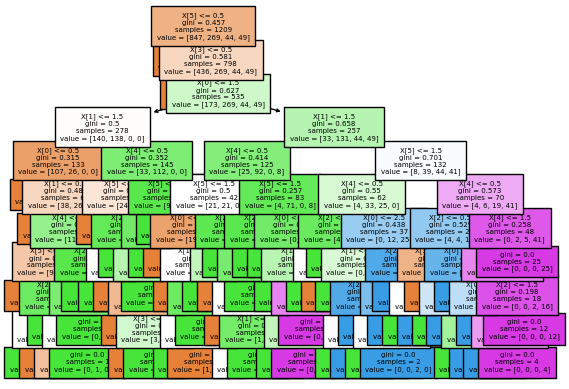

In [401]:
clf = tree.DecisionTreeClassifier(max_depth = 10, min_samples_leaf=1)
clf.fit(X_train, Y_train)

tree.plot_tree(clf, filled=True, fontsize=5)
print(clf.score(X_test, Y_test))

In [402]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   target    1728 non-null   object
dtypes: object(7)
memory usage: 108.0+ KB


In [403]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y.astype('int'), train_size=0.95, random_state=0)

#on fait un gridSearch
tuned_params = {"max_depth":[1, 2, 3, 4, 5, 6, 10, 20, 30], "min_samples_leaf":[1, 2, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}
grid_search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=tuned_params, cv=10)
grid_search.fit(X_train, Y_train)
print(grid_search.best_estimator_.score(X_test, Y_test))
print(grid_search.best_params_)




0.896551724137931
{'max_depth': 10, 'min_samples_leaf': 1}


0.9310344827586207


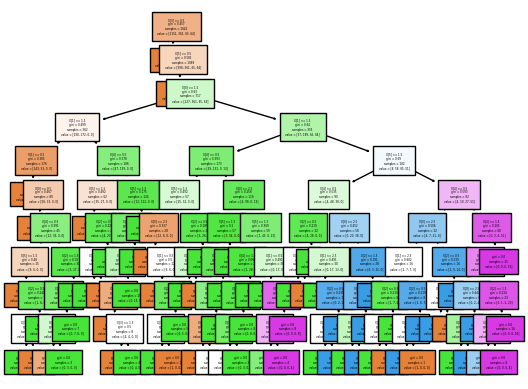

In [404]:

clf = tree.DecisionTreeClassifier(max_depth = 10, min_samples_leaf=1)
clf.fit(X_train, Y_train)

tree.plot_tree(clf, filled=True, fontsize=2)
print(clf.score(X_test, Y_test))

0.9310344827586207
[[58  2  0  0]
 [ 1 18  0  0]
 [ 0  3  4  0]
 [ 0  0  0  1]]


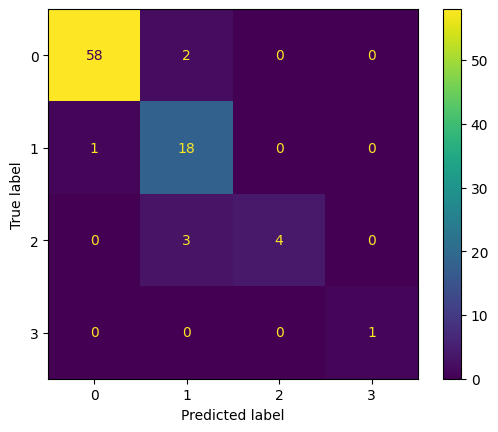

In [405]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


resultat = clf.predict(X_test)
clf.score(X_test, Y_test)
#score en test de l'arbre de décision 0.9777777777777777
print(clf.score(X_test, Y_test))
cm =confusion_matrix(resultat, Y_test)
print(confusion_matrix(resultat, Y_test))


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

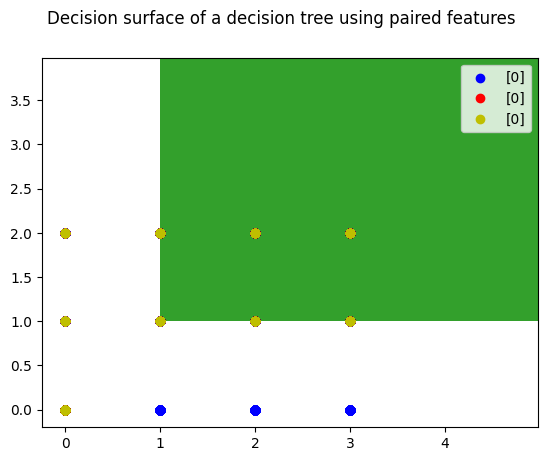

In [406]:
import numpy as np

# Paramètres
n_classes = 4
plot_colors = "bry" 
# blue-red-yellow
plot_step = 0.02
# Choisir les attributs longueur et largeur des pétales
pair = [2, 3]
# On ne garde seulement les deux attributs
X2 = X.iloc[:, pair]
X2 = X2.to_numpy()
y = y.to_numpy()

# Apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X2, y.astype('int'))
# Affichage de la surface de décision
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(1, 5, plot_step), np.arange(1, 4, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.axis("tight")
# Affichage des points d'apprentissage
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X2[idx, 0], X2[idx, 1], c=color, label=y[i],cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()
